## ***`Exploratory Data Analysis (EDA)` = Inspect + Clean + Visualize + Interpret***

### EDA is the process of **summarising**, **visualising**, and **understanding patterns** in the dataset ***`BEFORE`*** applying machine learning or statistical models.

### ***`STEP-1: IMPORTING LIBRARIES`***

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### ***`STEP-2: CREATE A DUMMY DATASET`***

In [2]:
# Create a Dummy Dataset
np.random.seed(42)

eda_db = pd.DataFrame({
    "Cust_ID": range(1, 21),
    "Age": np.random.randint(18, 60, 20),
    "Gender": np.random.choice(['Male', 'Female'], 20),
    "Annual_Income": np.random.randint(20000, 100000, 20),
    "Spending_Score": np.random.randint(1, 100, 20),
    "Churned": np.random.choice([0, 1], 20)
})

In [3]:
print(f"EDA DataBase:\n", eda_db.head(5))

EDA DataBase:
    Cust_ID  Age  Gender  Annual_Income  Spending_Score  Churned
0        1   56  Female          79150               8        1
1        2   46  Female          85725              47        1
2        3   32  Female          55773              35        1
3        4   25    Male          87435              78        0
4        5   38    Male          76886              81        1


In [4]:
print(f"EDA DataBase:\n", eda_db.sample(5))

EDA DataBase:
     Cust_ID  Age  Gender  Annual_Income  Spending_Score  Churned
1         2   46  Female          85725              47        1
4         5   38    Male          76886              81        1
5         6   56  Female          86803              36        0
3         4   25    Male          87435              78        0
10       11   41    Male          61606              54        0


### ***`STEP-3: DATA INSPECTION`***

In [5]:
# Date Shape and Information
print(f"-->> Shape of Data:\n {eda_db.shape}")
print(f"\n-->> Data Information:\n{eda_db.info()}")
print(f"\n-->> Missing Values:\n{eda_db.isnull().sum()}") 
print(f"\n-->> Basic Statistics:\n{eda_db.describe()}")

-->> Shape of Data:
 (20, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Cust_ID         20 non-null     int64 
 1   Age             20 non-null     int32 
 2   Gender          20 non-null     object
 3   Annual_Income   20 non-null     int32 
 4   Spending_Score  20 non-null     int32 
 5   Churned         20 non-null     int32 
dtypes: int32(4), int64(1), object(1)
memory usage: 772.0+ bytes

-->> Data Information:
None

-->> Missing Values:
Cust_ID           0
Age               0
Gender            0
Annual_Income     0
Spending_Score    0
Churned           0
dtype: int64

-->> Basic Statistics:
        Cust_ID        Age  Annual_Income  Spending_Score    Churned
count  20.00000  20.000000      20.000000       20.000000  20.000000
mean   10.50000  39.900000   64316.450000       43.750000   0.600000
std     5.91608  11.968819   24285.33

### ***Step-3 Insights:***
#### -> Dataset has 20 customers, no missing values;
#### -> Features include demographic (Age, Gender), financials (Income), behavioural (Spending Score), and outsome (Churned);

### ***`STEP-4: UNIVARIATE ANALYSIS`***

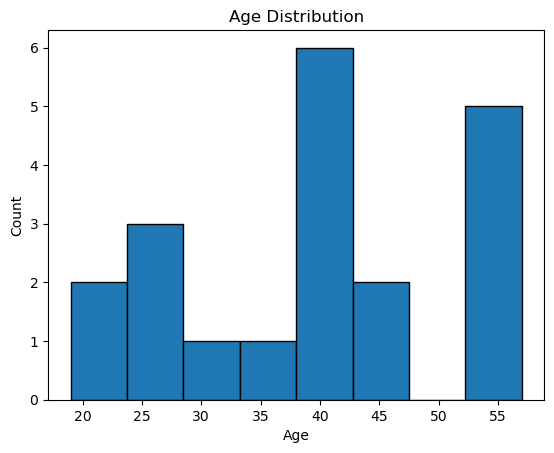

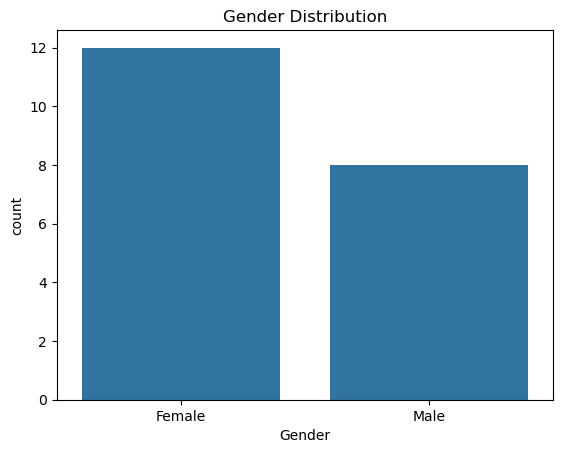

In [6]:
# Age Distribution
plt.hist(eda_db['Age'], bins = 8, edgecolor = 'black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Gender Count
sns.countplot(x = 'Gender', data = eda_db)
plt.title('Gender Distribution')

plt.show()

### ***Step-4 Insights:***
#### -> **Age** - Most customers fall in the `25-45` range, indicating a `young to mid-aged` customer base;
#### -> **Gender** - Distribution is fairly balanced (depends on random gender but usually  ~ 50/50);
#### -> **Spending Score** - Spread widely (from 1 - 100), meaning customers show varied engagement levels;

### ***`STEP-5: BIVARIATE ANALYSIS`***

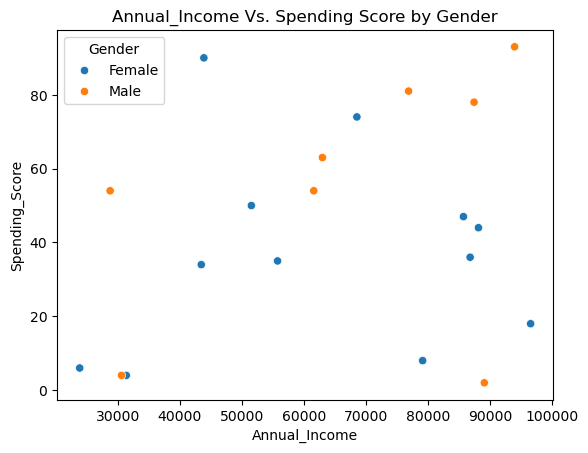

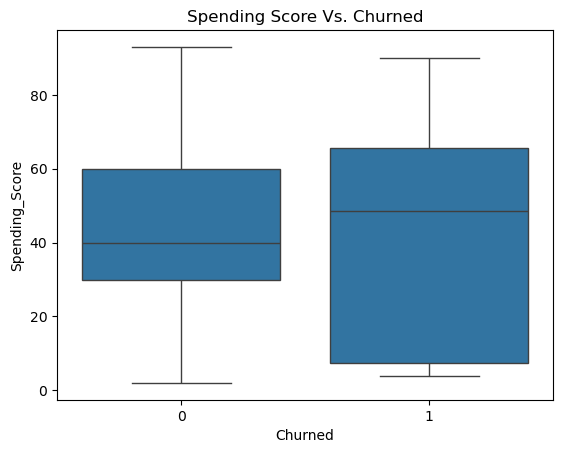

In [7]:
# Income Vs. Spending Score
sns.scatterplot(x = 'Annual_Income', y = 'Spending_Score', hue = 'Gender', data = eda_db)
plt.title('Annual_Income Vs. Spending Score by Gender')
plt.show()

# Boxplot: Spending Score by Churn
sns.boxplot(x = 'Churned', y = 'Spending_Score', data = eda_db)
plt.title('Spending Score Vs. Churned')
plt.show()

### ***Step-5 Insights:***
#### -> **Annual Income  Vs. Spending Score:** 

#### $ Some high-income customers have `low spending scores` -> possible disengagement;

#### $ Some lower-income customers `spend heavily` -> highly engaged segment;


#### -> **Spending Score Vs. Churn:** 

#### $ Customers with `low spending scores` are more likely to churn;

#### $ High spending customers mostly stay  active -> spending scoreis a `leading indicator of churn`;

### ***`STEP-6: CORRELATION ANALYSIS`***

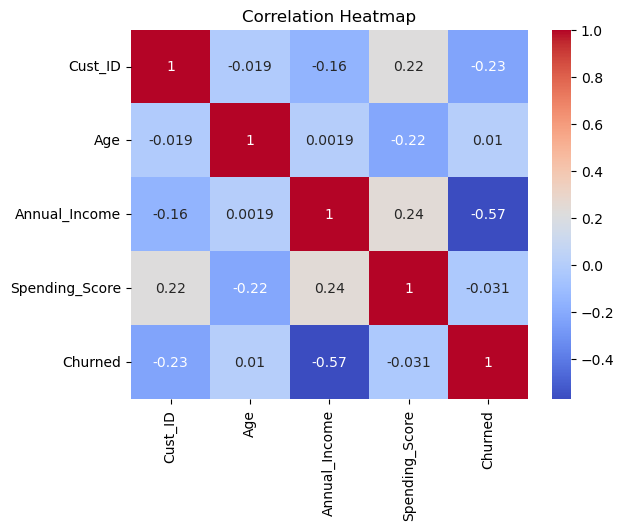

In [8]:
# Numeric Correaltion
corr = eda_db.corr(numeric_only = True)
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### ***Step-6 Insights:***

#### -> ***`Income and Spending Score:`*** `Weak Correlation` (not strongly related) -> High earners don't necessarily spend more;

#### -> ***`Spending Score and Churn:`*** `Negative Correlation` -> lower spending score linked to higher churn probability;

#### -> ***`Age and Churn:`*** `No Strong Relationship` -> observed in dummy data, but could vary in real-world;


### ***`STEP-7: FEATURE ENGINEERING`***

In [9]:
# Create Age Groups
Ages = [18, 30, 40, 50, 60]
Age_Groups = ["18-29", "30-39", "40-49", "50-59"]
eda_db['Age_Group'] = pd.cut(eda_db['Age'], bins = Ages, labels = Age_Groups)

print(eda_db[['Age', 'Age_Group']].head(5))

print(f"\nSpread Across all Age-Groups:\n{eda_db['Age_Group'].value_counts()}")

   Age Age_Group
0   56     50-59
1   46     40-49
2   32     30-39
3   25     18-29
4   38     30-39

Spread Across all Age-Groups:
Age_Group
18-29    5
30-39    5
40-49    5
50-59    5
Name: count, dtype: int64


### ***Step-7 Insights:***

#### -> ***`18 - 20 Group:`*** Usually `Higher Spending` scores, more engaged;

#### -> ***`40 - 49 Group:`*** Mixed Spending, some low-engagment customers -> `Potential Retention Risk`;

### ***`STEP-8: RECOMMENDATIONS`***

#### ***`1. Customer Retention`***

**->** Focus on low spending score customers, as they are at the highest risk of churn;

**->** Offer personalized incentives (discounts, loyalty points, reminders) to re-engage them;


#### ***`2. Target Marketing`***

**$ Segment customers by Age Groups:**

**->** 18–29: Tech-savvy, high-spending — target with online promotions, social media ads;

**->** 40–59: Retention focus — provide exclusive offers, better customer support;


#### ***`3. Income vs Engagement`***

**->** Since income doesn’t strongly drive spending, promotions should focus on behavior rather than income bracket;

**->** Introduce behavior-based segmentation (e.g., frequency of purchase, spending tier);


#### ***`4. Churn Prediction Model`***

**->** Build a classification model (e.g., Logistic Regression, Random Forest) with predictors: Spending_Score, Age_Group, Gender;

**->** Use it to predict churn early and trigger retention strategies;


#### ***`5. Business Actions`***

**->** Create a customer loyalty program rewarding consistent spenders;

**->** Perform A/B testing on targeted offers for low-engagement groups;   **`->To Be Tested...<-`**

**->** Monitor spending score trends monthly to identify declining customers early;

### ***`STEP-9: SUMMARY`***

#### ***-->>*** `Spending Score` is the **strongest churn indicator**;

#### ***-->>*** **Retention campaigns** should focus on low-spending customers, especially in the `Older Age Groups`;

#### ***-->>*** Use **Behavior-Based Segmentation** rather than `Income-Based Targeting`;